In [273]:
# I will use this cell to import every library that i need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re

In [274]:
# I open the file and check the headings.

attacks = pd.read_csv('data/attacks_clean.csv')
attacks.head()

,Unnamed: 0,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,Year,Month,Day,Fatal
0,0,Boat,USA,California,"Oceanside, San Diego County",sailing,Julie Wolfe,F,57.0,"No injury to occupant, outrigger canoe and pad...",N,afternoon,white_shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.0,6.0,25.0,N
1,1,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",fishing,Adyson McNeely,F,11.0,Minor injury to left thigh,N,afternoon,species_not_confirmed,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.0,6.0,18.0,N
2,2,Invalid,USA,Hawaii,"Habush, Oahu",surfing,John Denges,M,48.0,Injury to left lower leg from surfboard skeg,N,morning,species_not_confirmed,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.0,6.0,9.0,N
3,3,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,surfing,male,M,NaN,Minor injury to lower leg,N,unknown,species_not_confirmed,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.0,6.0,8.0,N
4,4,Provoked,MEXICO,Colima,La Ticla,swiming,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,tiger_shark,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.0,6.0,4.0,N


In [275]:
# We are going to test the first hypotesis. Shark's nationality affects how sexist they are.

C:\Users\sergi\AppData\Local\Temp\ipykernel_9624\2434401423.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_sex_filtered['percentage_woman']=country_sex.apply(lambda x : x['F']/(x['F']+x['M'])*100,axis=1)
C:\Users\sergi\AppData\Local\Temp\ipykernel_9624\2434401423.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_sex_filtered.sort_values(by='percentage_woman', ascending=False,inplace=True)


Sex                 F     M  percentage_woman
Country                                      
CROATIA             9    25         26.470588
EGYPT              10    28         26.315789
SPAIN               9    35         20.454545
GREECE              5    20         20.000000
HONG KONG           4    20         16.666667
USA               337  1892         15.118887
BAHAMAS            15    94         13.761468
FIJI                8    54         12.903226
MEXICO             11    78         12.359551
NEW ZEALAND        13   115         10.156250
MOZAMBIQUE          4    41          8.888889
FRENCH POLYNESIA    2    23          8.000000
JAMAICA             2    25          7.407407
IRAN                2    27          6.896552
AUSTRALIA          88  1250          6.576981
PHILIPPINES         4    57          6.557377
PANAMA              2    30          6.250000
NEW CALEDONIA       3    50          5.660377
SOUTH AFRICA       26   553          4.490501
PAPUA NEW GUINEA    6   128       

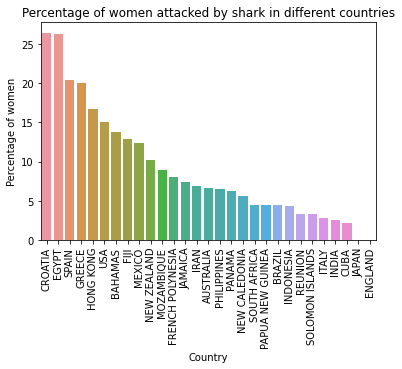

In [276]:
# I create a cross tab with country and sex fields, so I can see the data groped by Countries. I added a calculated percentage so I can see whats the country with higher percentage of womans attacked.

country_sex=pd.crosstab(attacks['Country'], attacks["Sex"])
country_sex_filtered=country_sex[(country_sex['F']+country_sex['M'])>20]

country_sex_filtered['percentage_woman']=country_sex.apply(lambda x : x['F']/(x['F']+x['M'])*100,axis=1)
country_sex_filtered.sort_values(by='percentage_woman', ascending=False,inplace=True)

print(country_sex_filtered)
print(country_sex_filtered.columns)
print(country_sex_filtered.index)
fig=sns.barplot(x=country_sex_filtered.index,y='percentage_woman',data=country_sex_filtered)
fig.set_xlabel('Country')
fig.set_ylabel('Percentage of women')
fig.set_title('Percentage of women attacked by shark in different countries')
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.figure.savefig('images/country_sex.jpg')



In [277]:
# we can see that the mediterranean sharks tend to attack higher ratio of girls vs men!

C:\Users\sergi\AppData\Local\Temp\ipykernel_9624\3646066938.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\sergi\AppData\Local\Temp\ipykernel_9624\3646066938.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\sergi\AppData\Local\Temp\ipykernel_9624\3646066938.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\sergi\AppData\Local\Temp\ipykernel_9624\3646066938.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\sergi\AppData\Local\Temp\ipykernel_9624\3646066938.py:17: UserWarning: Matplotlib is currently using module

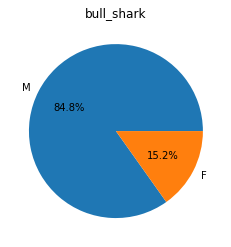

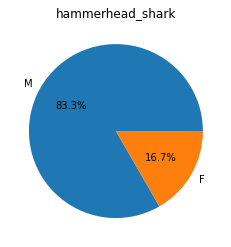

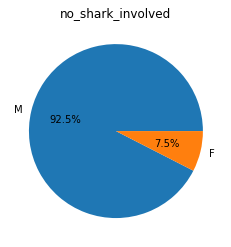

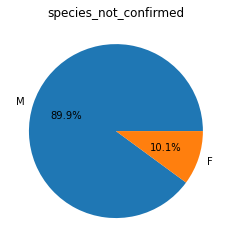

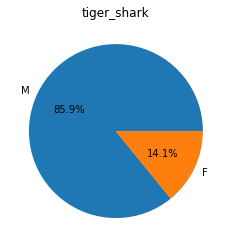

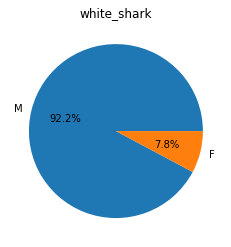

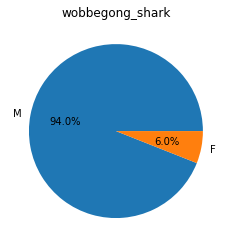

In [278]:
# We are going to test the second hypotesis: The species of shark that attacks female victims is different from the species that attacks male victims. 
# Group the data by species and sex
species_sex_group = attacks.groupby(['Species', 'Sex'])

# Count the number of males and females attacked by each species
species_sex_count = species_sex_group['Sex'].count()
species_df = species_sex_count.unstack()

# Calculate the percentage of women attacked by each species
species_df['percentage_of_women'] = species_df.apply(lambda x: x['F'] / (x['M'] + x['F']), axis=1)

# Plot the results as a pie chart for each species
for i, row in species_df.iterrows():
    fig, ax = plt.subplots()
    ax.pie([row['M'], row['F']], labels=['M', 'F'], autopct='%1.1f%%')
    ax.set_title(i)
    fig.show()
    fig.savefig(f'images/{i}.jpg')

C:\Users\sergi\AppData\Local\Temp\ipykernel_9624\1712688642.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\sergi\AppData\Local\Temp\ipykernel_9624\1712688642.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


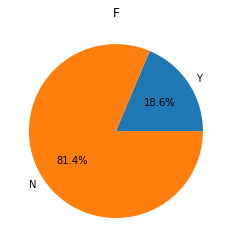

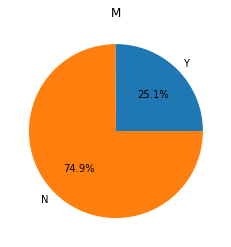

In [279]:
# Female victims have a higher likelihood to suffer a lethal attack, compared to male victims.


fatal_sex = attacks.groupby(['Sex', 'Fatal'])

# Count the number of males and females that suffered a fatal attack
fatal_sex_count = fatal_sex['Fatal'].count()
fatal_df = fatal_sex_count.unstack()

# Calculate the percentage of women attacked by each species
fatal_df['percentage_of_women'] = fatal_df.apply(lambda x: x['Y'] / (x['Y'] + x['N']), axis=1)

# Plot the results as a pie chart for each species
for i, row in fatal_df.iterrows():
    fig, ax = plt.subplots()
    ax.pie([row['Y'], row['N']], labels=['Y', 'N'], autopct='%1.1f%%')
    ax.set_title(i)
    fig.show()
    fig.savefig(f'images/{i}.jpg')

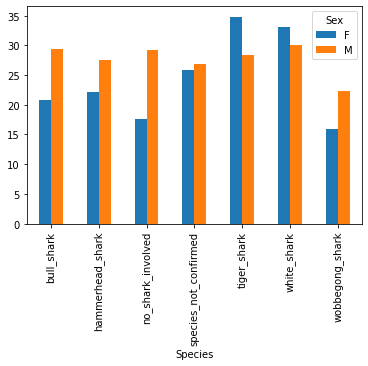

In [280]:
#correlation between age and species

species_age = attacks.groupby(['Species','Sex'])['Age'].mean().unstack().plot(kind='bar')
species_age.figure.savefig('images/species_age.jpg')



Sex Activity    F     M  percentage_girls  percentage_boys
0    fishing   50  1062          4.496403        95.503597
1     others   65   691          8.597884        91.402116
2    sailing   22   273          7.457627        92.542373
3    surfing  107  1321          7.492997        92.507003
4    swiming  393  2318         14.496496        85.503504


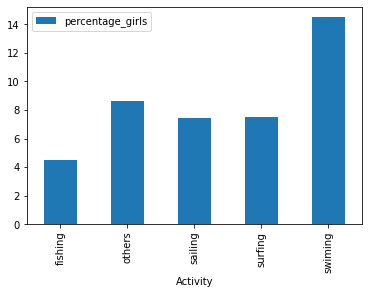

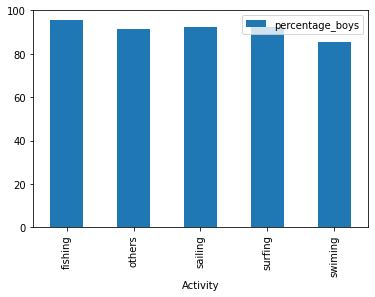

In [281]:
#percentage of female attacks depending on the activity
species_activity = attacks.groupby(['Activity','Sex'])['Sex'].count().unstack()
species_activity['percentage_girls']=species_activity['F']/(species_activity['F']+species_activity['M'])*100
species_activity['percentage_boys']=species_activity['M']/(species_activity['F']+species_activity['M'])*100
species_activity.reset_index(inplace=True)

print(species_activity)
fig1 = species_activity.plot(kind='bar',x='Activity', y='percentage_girls')
fig1.figure.savefig('images/activity_female.jpg')
fig2= species_activity.plot(kind='bar',x='Activity', y='percentage_boys')
fig2.figure.savefig('images/activity_boys.jpg')